## PyTorch是什么?

它是一个基于 Python 的科学计算包, 其主要是为了解决两类场景:

- NumPy 的替代品, 以使用 GPU 的强大加速功能. 
- 个深度学习研究平台, 提供最大的灵活性和速度. 

## 一. 新手入门

### Tensors(张量)

Tensor 是 PyTorch 中重要的数据结构, 可认为是一个高维数组. 它可以是一个数 (标量) 、一维数组 (向量) 、二维数组 (矩阵) 以及更高维的数组. Tensor 和 Numpy 的 ndarrays 类似, 但 Tensor 可以使用 GPU 进行加速. Tensor 的使用和 Numpy 及 Matlab 的接口十分相似, 下面通过几个例子来看看 Tensor 的基本使用. 

In [1]:
import torch as t

1.构建5*3的矩阵, 只是分配了空间, 未初始化

In [2]:
x=t.Tensor(5,3)
x


 1.6395e-43  0.0000e+00  9.2486e-43
 0.0000e+00  7.0065e-45  4.8617e+30
 4.4280e-37  0.0000e+00  0.0000e+00
 0.0000e+00  2.7552e-40  1.7749e+28
 1.6604e-36  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [3]:
type(x)

torch.FloatTensor

2.使用 [0,1] 均匀分布随机初始化二维数组

In [4]:
x = t.rand(5,3)
x


 0.8483  0.4879  0.9843
 0.9719  0.6333  0.3482
 0.3585  0.9425  0.2510
 0.2901  0.8676  0.8539
 0.7581  0.5903  0.1601
[torch.FloatTensor of size 5x3]

In [5]:
x.size()

torch.Size([5, 3])

3.torch.Size 是 tuple 对象的子类, 支持 tuple 的所有操作. 

In [6]:
x.size()[0]

5

4.加法运算

In [7]:
#第一种写法
y=t.rand(5,3)
x+y


 1.1953  1.2616  1.8893
 1.8912  0.7641  0.9240
 0.9479  1.4463  0.6354
 1.1362  1.5495  0.9203
 1.6701  1.5588  1.1289
[torch.FloatTensor of size 5x3]

In [8]:
#第二种写法
t.add(x,y)


 1.1953  1.2616  1.8893
 1.8912  0.7641  0.9240
 0.9479  1.4463  0.6354
 1.1362  1.5495  0.9203
 1.6701  1.5588  1.1289
[torch.FloatTensor of size 5x3]

In [9]:
#第三种写法, 指定加法结果的输出目标. 需要预先分配空间
result = t.Tensor(5,3)
t.add(x,y,out=result)
result


 1.1953  1.2616  1.8893
 1.8912  0.7641  0.9240
 0.9479  1.4463  0.6354
 1.1362  1.5495  0.9203
 1.6701  1.5588  1.1289
[torch.FloatTensor of size 5x3]

5.函数名后面带下划线 _ 的函数会修改 Tensor 本身.

In [10]:
print('最初的y')
print(y)
print('使用add加法之后, y的结果未改变')
y.add(x)
print(y)
print('使用add_加法之后, y的结果改变')
y.add_(x)
print(y)

最初的y

 0.3470  0.7737  0.9050
 0.9193  0.1309  0.5758
 0.5894  0.5038  0.3844
 0.8461  0.6819  0.0665
 0.9120  0.9685  0.9688
[torch.FloatTensor of size 5x3]

使用add加法之后, y的结果未改变

 0.3470  0.7737  0.9050
 0.9193  0.1309  0.5758
 0.5894  0.5038  0.3844
 0.8461  0.6819  0.0665
 0.9120  0.9685  0.9688
[torch.FloatTensor of size 5x3]

使用add_加法之后, y的结果改变

 1.1953  1.2616  1.8893
 1.8912  0.7641  0.9240
 0.9479  1.4463  0.6354
 1.1362  1.5495  0.9203
 1.6701  1.5588  1.1289
[torch.FloatTensor of size 5x3]



6.Tensor 还支持很多操作, 包括数学运算、线性代数、选择、切片等等, 其接口设计与 Numpy 极为相似. 更详细的使用方法, 会在后面系统讲解. Tensor 和 Numpy 的数组之间的互操作非常容易且快速. 对于 Tensor 不支持的操作, 可以先转为 Numpy 数组处理, 之后再转回 Tensor. 

In [11]:
x[:,1]


 0.4879
 0.6333
 0.9425
 0.8676
 0.5903
[torch.FloatTensor of size 5]

把 Tensor 转换为 Numpy

In [12]:
a = t.ones(5)
b = a.numpy()
print(a,b)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]
 [ 1.  1.  1.  1.  1.]


把 Numpy 转换为 Tensor

In [13]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a)
print(a,b)

[ 1.  1.  1.  1.  1.] 
 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]



Tensor 和 numpy 对象共享内存, 所以他们之间的转换很快, 而且几乎不会消耗什么资源. 但这也意味着, 如果其中一个变了, 另外一个也会随之改变. 

In [14]:
b.add_(1)
print(a,b)

[ 2.  2.  2.  2.  2.] 
 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



7.Tensor 可以通过 .cuda 方法转换为 GPU 的 Tensor, 从而享受 GPU 带来的加速运算. 

In [15]:
# 在不支持CUDA的机器下, 下一步不会运行
if t.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

## 二. Autograd: 自动微分

深度学习的算法本质上是通过反向传播求导数, 而 PyTorch 的 Autograd 模块则实现了此功能. 在 Tensor 上的所有操作, Autograd 都能为它们自动提供微分, 避免了手动计算导数的复杂过程. 
autograd.Variable 是 Autograd 中的核心类, 它简单封装了 Tensor , 并支持几乎所有 Tensor 有的操作. Tensor 在被封装为 Variable 之后, 可以调用它的 .backward 实现反向传播, 自动计算所有梯度

### Variable (变量) 

autograd.Variable 是包的核心类, 它包装了张量, 并且支持几乎所有的操作. 一旦你完成了你的计算, 你就可以调用 .backward() 方法, 然后所有的梯度计算会自动进行.你还可以通过 .data 属性来访问原始的张量, 而关于该 variable (变量) 的梯度会被累计到 .grad 上去.

Variable主要包含三个属性: 
- data:  保存 Variable 所包含的 Tensor
- grad:  保存 data 对应的梯度, grad 也是个 Variable
- grad_fn: 指向一个 Function 对象, 这个 Function 用来反向传播计算输入的梯度, 具体细节会在后面讲解

如果你想计算倒数, 你可以在 Variable 上调用 .backward() 方法. 如果 Variable 是标量的形式 (例如, 它包含一个元素数据) , 你不必指定任何参数给 backward(), 但是, 如果它有更多的元素. 你需要去指定一个 grad_output 参数, 该参数是一个匹配 shape (形状) 的张量.

In [16]:
from torch.autograd import Variable

1.使用 Tensor 创建一个 Variable

In [17]:
x = Variable(t.ones(2,2),requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [18]:
y = x.sum()
y

Variable containing:
 4
[torch.FloatTensor of size 1]

In [19]:
y.grad_fn

In [20]:
#方向传播, 计算梯度
y.backward()

In [21]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad 

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

2.grad 在反向传播过程中是累加的( accumulated ), 这意味着每一次运行反向传播, 梯度都会累加之前的梯度, 所以反向传播之前需把梯度清零. 

In [22]:
y.backward()
x.grad

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [23]:
y.backward()
x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [24]:
#以下划线结束的函数是inplace操作, 就像前面的add_
x.grad.data.zero_()


 0  0
 0  0
[torch.FloatTensor of size 2x2]

In [25]:
y.backward()
x.grad

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

3.Variable 和 Tensor 具有近乎一致的接口, 在实际使用中可以无缝切换. 

In [26]:
x = Variable(t.ones(4,5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
x_tensor_cos

Variable containing:
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
[torch.FloatTensor of size 4x5]




 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
[torch.FloatTensor of size 4x5]

## 三. 神经网络

### 神经网络可以使用 torch.nn 创建

Autograd 实现了反向传播功能, 但是直接用来写深度学习的代码在很多情况下还是稍显复杂, torch.nn 是专门为神经网络设计的模块化接口. nn 构建于  Autograd 之上, 可用来定义和运行神经网络. nn.Module 是 nn 中最重要的类, 可把它看成是一个网络的封装, 包含网络各层定义以及 forward 方法, 调用 forward(input) 方法, 可返回前向传播的结果. 下面就以最早的卷积神经网络: LeNet 为例, 来看看如何用 nn.Module 实现. LeNet 的网络结构如图所示. 
![imge](http://pytorch.org/tutorials/_images/mnist.png)

这是一个基础的前向传播( feed-forward )网络: 接收输入, 经过层层传递运算, 得到输出. 

一个典型的神经网络训练过程如下: 

- 定义具有一些可学习参数(或权重)的神经网络
- 迭代输入数据集
- 通过网络处理输入
- 计算损失(输出的预测值与实际值之间的距离)
- 将梯度传播回网络
- 更新网络的权重, 通常使用一个简单的更新规则: weight = weight - learning_rate * gradient

### 1.定义网络

定义网络时, 需要继承 nn.Module , 并实现他的 forward 方法, 把网络中具有学习参数的层次放在构造函数 __init__ 中, 如果某一层(如 relu )不具有可学习的参数, 则既可放在构造函数中, 也可以不放, 但不建议放在其中, 而在 forward 中使用 nn.funtional 代替. 

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        ##nn.Module子类的函数必须在构造函数中执行父类的构造函数
        #下式等价于nn.Module.__init__(self)
        super(Net,self).__init__()
        
        #卷积层'1'表示输入图片为单通道,'6'表示输出通道数, '5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1,6,5)
        #卷积层
        self.conv2 = nn.Conv2d(6,16,5)
        #仿射层/全连接层, y = Wx + b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        #卷积--激活--池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        #reshape '-1'表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


只要在 nn.Module 的子类中定义了 forward 函数, backward 函数就会自动被实现(利用 Autograd ) 在 forward 函数中可以使用任何 Variable 支持的函数, 还可以使用 if , for 循环,  print 、log 等 Python 语法, 写法和标准的Python写法一致. 

网络的学习参数可以通过 net.parameters() 返回,  net.named_parameters 可同时返回学的参数以及名称. 

In [28]:
params = list(net.parameters())
print(len(params))

10


In [29]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward 函数的输入和输出都是 Variable , 只有 Variable 才具有自动求导功能, 而 Tensor 是没有的, 所以在输入时, 需把 Tensor 封装成 Variable. 

In [30]:
input = Variable(t.randn(1,1,32,32))
out = net(input)
out.size()

torch.Size([1, 10])

In [31]:
#所有参数的梯度清零
net.zero_grad()
#反向传播
out.backward(Variable(t.ones(1,10)))

需要注意的是, torch.nn 只支持 mini-batches , 不支持一次只输入一个样本, 即一次必须是一个 batch . 但如果只想输入一个样本, 则用 input.unsqueeze(0) 将 batch_size 设为１. 例如 nn.Conv2d 输入必须是4维的, 形如 nSamples×nChannels×Height×Width . 可将 nSample 设为 1 , 即 1×nChannels×Height×Width. 

在继续之前, 让我门回顾一下迄今为止所有见过的类.

概括:
- torch.Tensor - 一个 多维数组.
- autograd.Variable - 包装张量并记录应用于其上的历史操作. 具有和 Tensor 相同的 API ,还有一些补充, 如 backward(). 另外 拥有张量的梯度.
- nn.Module - 神经网络模块. 方便的方式封装参数, 帮助将其移动到 GPU , 导出, 加载等. 
- nn.Parameter - 一种变量, 当被指定为 Model 的属性时, 它会自动注册为一个参数.
- autograd.Function - 实现 * autograd 操作的向前和向后定义*. 每个 Variable 操作, 至少创建一个 Function 节点, 连接到创建 Variable 的函数, 并 编码它的历史.

在这一点上, 我们涵盖:
- 定义一个神经网络
- 处理输入并反向传播
还剩下:

- 计算损失函数
- 更新网络的权重

### 2.损失函数

nn 实现了神经网络中大多数的损失函数, 例如 nn.MSELoss 用来计算均方误差, nn.CrossEntropyLoss 用来计算交叉熵损失. 

In [32]:
output = net(input)
target = Variable(t.arange(0,10))
criterion = nn.MSELoss()
loss = criterion(output,target)
loss

Variable containing:
 28.7705
[torch.FloatTensor of size 1]

如果对 loss 进行反向传播溯源(使用 gradfn 属性), 可看到它的计算图如下: 

    input  -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
         -> view -> linear -> relu -> linear -> relu -> linear 
         -> MSELoss
         -> loss
当调用 loss.backward() 时, 该图会动态生成并自动微分, 也即会自动计算图中参数( Parameter )的导数. 

In [33]:
#运行.backward(), 观察调用之前和调用之后的grad
net.zero_grad()#把net中所有可以学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

反向传播之后 conv1.bias的梯度
Variable containing:
1.00000e-02 *
 -1.3395
  1.0183
 -5.0718
  4.1131
  2.1308
 -7.4020
[torch.FloatTensor of size 6]



### 3.优化器 (更新权重) 

在反向传播计算完所有参数的梯度后, 还需要使用优化方法来更新网络的权重和参数, 例如随机梯度下降法( SGD )的更新策略如下: 

    weight = weight - learning_rate * gradient
手动实现如下: 

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)# inplace 减法
torch.optim 中实现了深度学习中绝大多数的优化方法, 例如 RMSProp、Adam、SGD 等, 更便于使用, 因此大多数时候并不需要手动写上述代码. 

In [34]:
import torch.optim as optim
#新建一个优化器, 指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(),lr = 0.01)

#在训练过程中
#先将梯度清零 (与net.zero_grad()效果一样) 
optimizer.zero_grad()

#计算损失
output = net(input)
loss = criterion(output,target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

## 四. 训练一个分类器

是这个, 你已经看到了如何定义神经网络, 计算损失并更新网络的权重.

现在你可能会想,

### 数据呢?
一般来说, 当你不得不处理图像, 文本, 音频或者视频数据时, 你可以使用标准的 Python 包将数据加载到一个 numpy 数组中. 然后你可以将这个数组转换成一个 torch.*Tensor.

- 对于图像, 会用到的包有 Pillow, OpenCV .
- 对于音频, 会用的包有 scipy 和 librosa.
- 对于文本, 原始 Python 或基于 Cython 的加载, 或者 NLTK 和 Spacy 都是有用的.
- 特别是对于 vision, 我们已经创建了一个叫做 torchvision, 其中有对普通数据集如 Imagenet, CIFAR10, MNIST, 等和用于图像数据的转换器, 即, torchvision.datasets 和 torch.utils.data.DataLoader.

这提供了巨大的便利, 避免了编写重复代码.

在深度学习中数据加载及预处理是非常复杂繁琐的, 但 PyTorch 提供了一些可极大简化和加快数据处理流程的工具. 同时, 对于常用的数据集, PyTorch 也提供了封装好的接口供用户快速调用, 这些数据集主要保存在 torchvison 中. 

torchvision 实现了常用的图像数据加载功能, 例如 Imagenet、CIFAR10、MNIST 等, 以及常用的数据转换操作, 这极大地方便了数据加载, 并且代码具有可重用性. 

### 一个小的案例: CIFAR-10 分类

下面我们来尝试实现对 CIFAR-10 数据集的分类, 步骤如下:

- 1.使用 torchvision 加载并预处理 CIFAR-10 数据集
- 2.定义一个卷积升级网络
- 3.定义一个损失函数和优化器
- 4.训练网络并更新网络参数
- 5.测试网络

### 1.CIFAR-10 数据加载及预处理

[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) 是一个常用的彩色图片数据集, 它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'. 每张图片都是3×32×323×32×32, 也即3-通道彩色图片, 分辨率为32×3232×32. 

In [40]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #可以把Tensor转成Image, 方便可视化

In [41]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集, 
# 大约100M, 需花费一定的时间, 
# 如果已经下载有CIFAR-10, 可通过root参数指定

# 定义对数据的预处理,transforms.Normalize  归一化
transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#训练集
trainset = tv.datasets.CIFAR10(
    root='/cy/',
    train = True,
    download = True,
    transform = transforms)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True,
    num_workers =2)

#测试集
testset = tv.datasets.CIFAR10(
    '/cy/',
    train = False,
    download = True,
    transform = transforms)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False,
    num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Dataset 对象是一个数据集, 可以按下标访问, 返回形如( data,label )的数据

ship


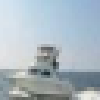

In [44]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader 是一个可迭代的对象, 它将 dataset 返回的每一条数据拼接成一个 batch , 并提供多线程加速优化和数据打乱等操作. 当程序对 dataset 的所有数据遍历完一遍之后, 相应的对 Dataloader 也完成了一次迭代. 

       bird       truck       plane        bird


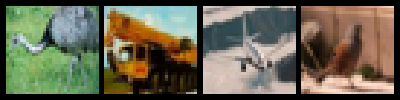

In [48]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

### 2.定义一个卷积神经网络

拷贝上面的 LeNet 网络, 修改 self.conv1 第一个参数为 3 通道, 因 CIFAR-10 是 3 通道彩图. 

In [49]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


### 3.定义损失函数和优化器(loss 和 optimizer)

In [50]:
from torch import optim
criterion = nn.CrossEntropyLoss()#交叉熵损失函数
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)

### 4.训练网络

这是事情开始变得有趣的时候. 我们只需循环遍历数据迭代器, 并将输入提供给网络和优化器. 

所有网络的训练流程都是类似的, 不断地执行如下流程: 

- 1.输入数据
- 2.前向传播+反向传播
- 3.更新参数

In [51]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        running_loss += loss.data[0]
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.855
[1,  6000] loss: 1.670
[1,  8000] loss: 1.554
[1, 10000] loss: 1.515
[1, 12000] loss: 1.479
[2,  2000] loss: 1.408
[2,  4000] loss: 1.359
[2,  6000] loss: 1.365
[2,  8000] loss: 1.325
[2, 10000] loss: 1.311
[2, 12000] loss: 1.290
Finished Training


### 5.测试网络

此处仅训练了 2 个 epoch (遍历完一遍数据集称为一个 epoch ) , 来看看网络有没有效果. 将测试图片输入到网络中, 计算它的 label , 然后与实际的 label 进行比较. 

实际的label:       cat     ship     ship    plane


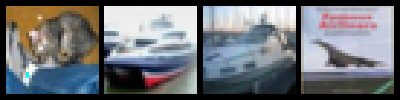

In [52]:
dataiter = iter(testloader)
images, labels = dataiter.next() 
# 一个batch返回4张图片
print('实际的label: ', ' '.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

接着计算网络预测的 label : 

In [53]:
# 计算图片在每个类别上的分数
outputs = net(Variable(images))
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:    cat plane  ship plane


已经可以看出效果, 准确率 50%, 但这只是一部分的图片, 再来看看在整个测试集上的效果. 

In [54]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 51 %


训练的准确率远比随机猜测(准确率 10% )好, 证明网络确实学到了东西. 

## 在GPU训练
就像之前把 Tensor 从 CPU 转到 GPU 一样, 模型也可以类似地从 CPU 转到 GPU . 

请记住, 您必须将输入和目标每一步都发送到 GPU. 

In [ ]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss = criterion(output,Variable(labels))

如果发现在 GPU 上并没有比 CPU 提速很多, 实际上是因为网络比较小, GPU 没有完全发挥自己的真正实力. 

## 在多个GPU上进行训练

如果你希望使用所有 GPU 来看更多的 MASSIVE 加速, 请查看可选[Optional: Data Parallelism](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/data_parallel_tutorial.html)



对PyTorch的基础介绍至此结束. 总结一下, 本节主要包含以下内容. 

- 1.Tensor: 类似 Numpy 数组的数据结构, 与 Numpy 接口类似, 可方便地互相转换. 
- 2.autograd/Variable: Variable 封装了 Tensor , 并提供自动求导功能. 
- 3.nn: 专门为神经网络设计的接口, 提供了很多有用的功能(神经网络层, 损失函数, 优化器等). 
- 4.神经网络训练: 以 CIFAR-10 分类为例演示了神经网络的训练流程, 包括数据加载、网络搭建、训练及测试. 

通过本节的学习, 相信读者可以体会出 PyTorch 具有接口简单、使用灵活等特点. 

### 我下一步去哪里？

- [训练神经网络玩电子游戏](http://pytorch.apachecn.org/cn/tutorials/intermediate/reinforcement_q_learning.html)
- [在 imagenet 上培训最先进的 ResNet 网络](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id11)
- [利用生成对抗网络训练人脸生成器](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id13)
- [使用 Recurrent LSTM 网络训练单词语言模型](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id15)
- [更多的例子](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id17)
- [更多教程](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id19)
- [在论坛上讨论 PyTorch](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id21)
- [与 Slack 上与其他用户聊天](http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/cifar10_tutorial.html#id23)